In [44]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc90/BHOSS_CODE"
data = "f05_b1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_333.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9225.032659 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 2.27027e-15 0.00185927
Total flux = 2.029133 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9003.597816 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 9.49303e-05
Total flux = 1.922476 Jy at 43 GHz
722:53:59.289 - Start Program


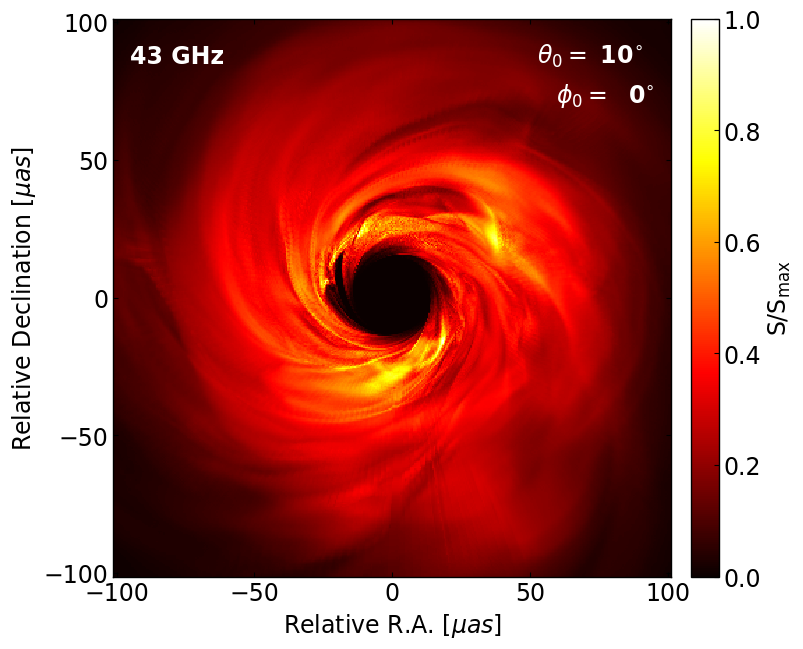

In [5]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [61]:
import os
import numpy as np

#find average flux
def bhoss_avg(Te_model,sig,inclination,phi0,model_name, ifreq=2):

    note=""
    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    elif (model_name == "SANEA05"):
        model_str = "bhoss_SA05"
        ind_start=900
        ind_end = 999
        note="192_"
    elif (model_name == "SANEA0"):
        model_str = "bhoss_SA0"
        ind_start=640
        ind_end = 739
    else:
        print("no model")
        return
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Te_model,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="%s_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%s%d.dat" \
        %(Te_model,sig,inclination,phi0,model_name,note,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+Te_model,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [46]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,10,0,"MADS41A5", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
311, flux: 2.706387 at 9003.597816
312, flux: 2.726640 at 9013.664967
313, flux: 2.744105 at 9023.730951
314, flux: 2.705129 at 9033.794470
315, flux: 2.616455 at 9043.862656
316, flux: 2.558132 at 9053.929463
317, flux: 2.501534 at 9063.995875
318, flux: 2.426452 at 9074.060236
319, flux: 2.361903 at 9084.125014
320, flux: 2.374167 at 9094.191161
321, flux: 2.418394 at 9104.258463
322, flux: 2.446576 at 9114.324296
323, flux: 2.469895 at 9124.388087
324, flux: 2.473427 at 9134.450798
325, flux: 2.437618 at 9144.515488
326, flux: 2.425504 at 9154.580838
327, flux: 2.350035 at 9164.643343
328, flux: 2.261027 at 9174.708090
329, flux: 2.151768 at 9184.774596
330, flux: 2.102173 at 9194.841238
331, flux: 2.066955 at 9204.906551
332, flux: 2.046839 at 9214.968879
333, flux: 2.040927 at 9225.032659
334, flux: 2.025332 at 9235.096933
335, flux: 2.01

In [47]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [48]:
import numpy as np
import os
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.028331 Jy, the density scale = 1.100000e-18


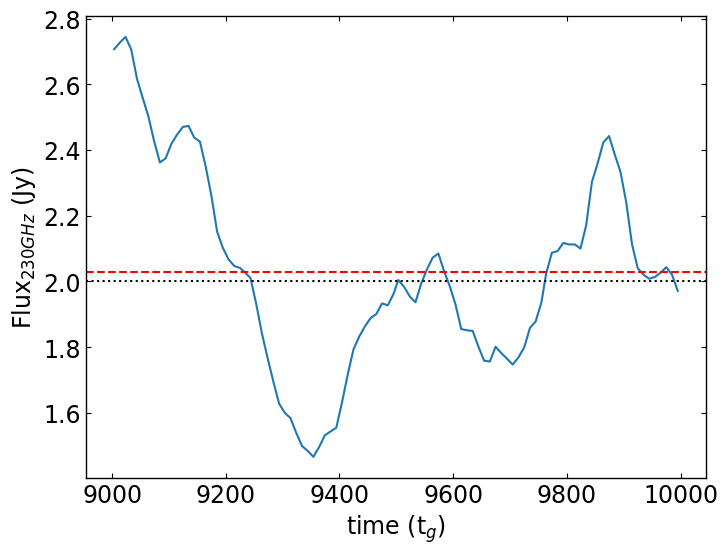

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [50]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.706387 Jy at 9003.597816
312:: 2.726640 Jy at 9013.664967
313:: 2.744105 Jy at 9023.730951
314:: 2.705129 Jy at 9033.794470
315:: 2.616455 Jy at 9043.862656
316:: 2.558132 Jy at 9053.929463
317:: 2.501534 Jy at 9063.995875
318:: 2.426452 Jy at 9074.060236
319:: 2.361903 Jy at 9084.125014
320:: 2.374167 Jy at 9094.191161
321:: 2.418394 Jy at 9104.258463
322:: 2.446576 Jy at 9114.324296
323:: 2.469895 Jy at 9124.388087
324:: 2.473427 Jy at 9134.450798
325:: 2.437618 Jy at 9144.515488
326:: 2.425504 Jy at 9154.580838
327:: 2.350035 Jy at 9164.643343
328:: 2.261027 Jy at 9174.708090
329:: 2.151768 Jy at 9184.774596
330:: 2.102173 Jy at 9194.841238
331:: 2.066955 Jy at 9204.906551
332:: 2.046839 Jy at 9214.968879
333:: 2.040927 Jy at 9225.032659
334:: 2.025332 Jy at 9235.096933
335:: 2.010109 Jy at 9243.486122
336:: 1.931548 Jy at 9253.551623
337:: 1.841757 Jy at 9263.615142
338:: 1.766120 Jy at 9273.678488
339:: 1.695015 Jy at 9283.741347
340:: 1.627992 Jy at 9293.805262
341:: 1.60

In [51]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,50,0,"MADS41A5", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
311, flux: 2.512604 at 9003.597816
312, flux: 2.524511 at 9013.664967
313, flux: 2.522992 at 9023.730951
314, flux: 2.451439 at 9033.794470
315, flux: 2.346414 at 9043.862656
316, flux: 2.266220 at 9053.929463
317, flux: 2.189358 at 9063.995875
318, flux: 2.136296 at 9074.060236
319, flux: 2.086968 at 9084.125014
320, flux: 2.119657 at 9094.191161
321, flux: 2.141278 at 9104.258463
322, flux: 2.143828 at 9114.324296
323, flux: 2.202455 at 9124.388087
324, flux: 2.240149 at 9134.450798
325, flux: 2.241379 at 9144.515488
326, flux: 2.287143 at 9154.580838
327, flux: 2.242672 at 9164.643343
328, flux: 2.194949 at 9174.708090
329, flux: 2.125572 at 9184.774596
330, flux: 2.087065 at 9194.841238
331, flux: 2.066710 at 9204.906551
332, flux: 2.075010 at 9214.968879
333, flux: 2.105175 at 9225.032659
334, flux: 2.122458 at 9235.096933
335, flux: 2.12

In [52]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [53]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.052302 Jy, the density scale = 1.050000e-18


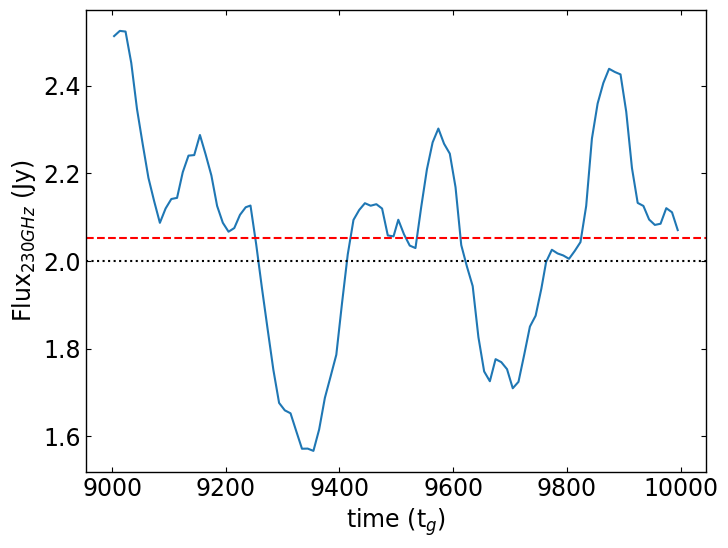

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [55]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.512604 Jy at 9003.597816
312:: 2.524511 Jy at 9013.664967
313:: 2.522992 Jy at 9023.730951
314:: 2.451439 Jy at 9033.794470
315:: 2.346414 Jy at 9043.862656
316:: 2.266220 Jy at 9053.929463
317:: 2.189358 Jy at 9063.995875
318:: 2.136296 Jy at 9074.060236
319:: 2.086968 Jy at 9084.125014
320:: 2.119657 Jy at 9094.191161
321:: 2.141278 Jy at 9104.258463
322:: 2.143828 Jy at 9114.324296
323:: 2.202455 Jy at 9124.388087
324:: 2.240149 Jy at 9134.450798
325:: 2.241379 Jy at 9144.515488
326:: 2.287143 Jy at 9154.580838
327:: 2.242672 Jy at 9164.643343
328:: 2.194949 Jy at 9174.708090
329:: 2.125572 Jy at 9184.774596
330:: 2.087065 Jy at 9194.841238
331:: 2.066710 Jy at 9204.906551
332:: 2.075010 Jy at 9214.968879
333:: 2.105175 Jy at 9225.032659
334:: 2.122458 Jy at 9235.096933
335:: 2.126368 Jy at 9243.486122
336:: 2.037686 Jy at 9253.551623
337:: 1.938480 Jy at 9263.615142
338:: 1.844210 Jy at 9273.678488
339:: 1.751783 Jy at 9283.741347
340:: 1.676427 Jy at 9293.805262
341:: 1.65

In [56]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1",1,90,0,"MADS41A5", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
311, flux: 2.215780 at 9003.597816
312, flux: 2.257759 at 9013.664967
313, flux: 2.308013 at 9023.730951
314, flux: 2.319708 at 9033.794470
315, flux: 2.268789 at 9043.862656
316, flux: 2.161712 at 9053.929463
317, flux: 2.026400 at 9063.995875
318, flux: 1.970740 at 9074.060236
319, flux: 1.979236 at 9084.125014
320, flux: 2.106726 at 9094.191161
321, flux: 2.182356 at 9104.258463
322, flux: 2.166155 at 9114.324296
323, flux: 2.274063 at 9124.388087
324, flux: 2.342470 at 9134.450798
325, flux: 2.323436 at 9144.515488
326, flux: 2.341751 at 9154.580838
327, flux: 2.289956 at 9164.643343
328, flux: 2.344725 at 9174.708090
329, flux: 2.278611 at 9184.774596
330, flux: 2.120617 at 9194.841238
331, flux: 2.059736 at 9204.906551
332, flux: 2.050500 at 9214.968879
333, flux: 2.029133 at 9225.032659
334, flux: 2.070788 at 9235.096933
335, flux: 2.01

In [57]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [58]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.030288 Jy, the density scale = 9.100000e-19


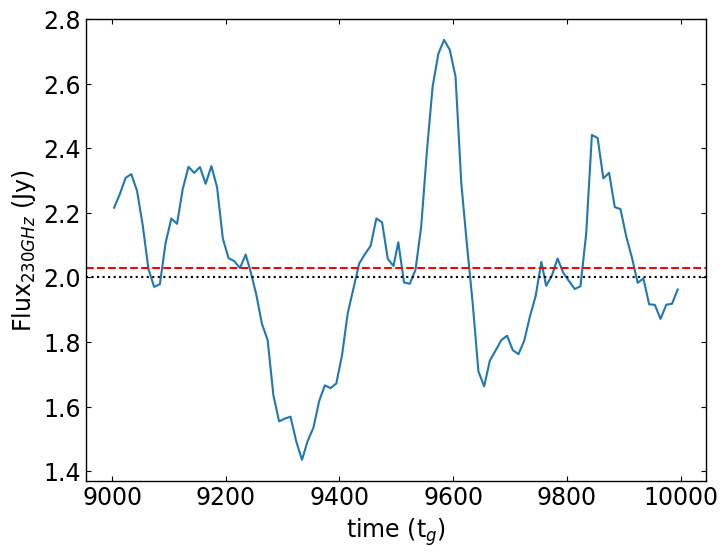

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [60]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.215780 Jy at 9003.597816
312:: 2.257759 Jy at 9013.664967
313:: 2.308013 Jy at 9023.730951
314:: 2.319708 Jy at 9033.794470
315:: 2.268789 Jy at 9043.862656
316:: 2.161712 Jy at 9053.929463
317:: 2.026400 Jy at 9063.995875
318:: 1.970740 Jy at 9074.060236
319:: 1.979236 Jy at 9084.125014
320:: 2.106726 Jy at 9094.191161
321:: 2.182356 Jy at 9104.258463
322:: 2.166155 Jy at 9114.324296
323:: 2.274063 Jy at 9124.388087
324:: 2.342470 Jy at 9134.450798
325:: 2.323436 Jy at 9144.515488
326:: 2.341751 Jy at 9154.580838
327:: 2.289956 Jy at 9164.643343
328:: 2.344725 Jy at 9174.708090
329:: 2.278611 Jy at 9184.774596
330:: 2.120617 Jy at 9194.841238
331:: 2.059736 Jy at 9204.906551
332:: 2.050500 Jy at 9214.968879
333:: 2.029133 Jy at 9225.032659
334:: 2.070788 Jy at 9235.096933
335:: 2.019192 Jy at 9243.486122
336:: 1.948200 Jy at 9253.551623
337:: 1.856450 Jy at 9263.615142
338:: 1.806091 Jy at 9273.678488
339:: 1.635951 Jy at 9283.741347
340:: 1.554435 Jy at 9293.805262
341:: 1.56